In [11]:
import denoising
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import skimage
from skimage.transform import rescale
from utils import mode
from utils import kmeans_vq
from utils import discretise
from skimage.measure import compare_mse

/home/redzin/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


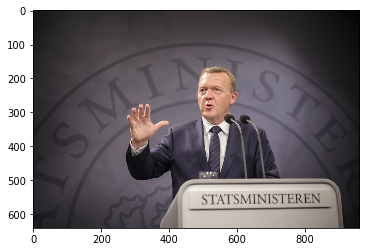

In [12]:
# Load the image
img = rescale(plt.imread('data/lars.jpg'),1.0)
img = skimage.img_as_float(img)
plt.imshow(img, cmap="gray")
plt.show()

In [13]:
# Settings
colours_bins = 10
n_iter = 80
samples = 100
map_iter = n_iter * samples
t0 = 4
diffusion = 0.995
beta = 5

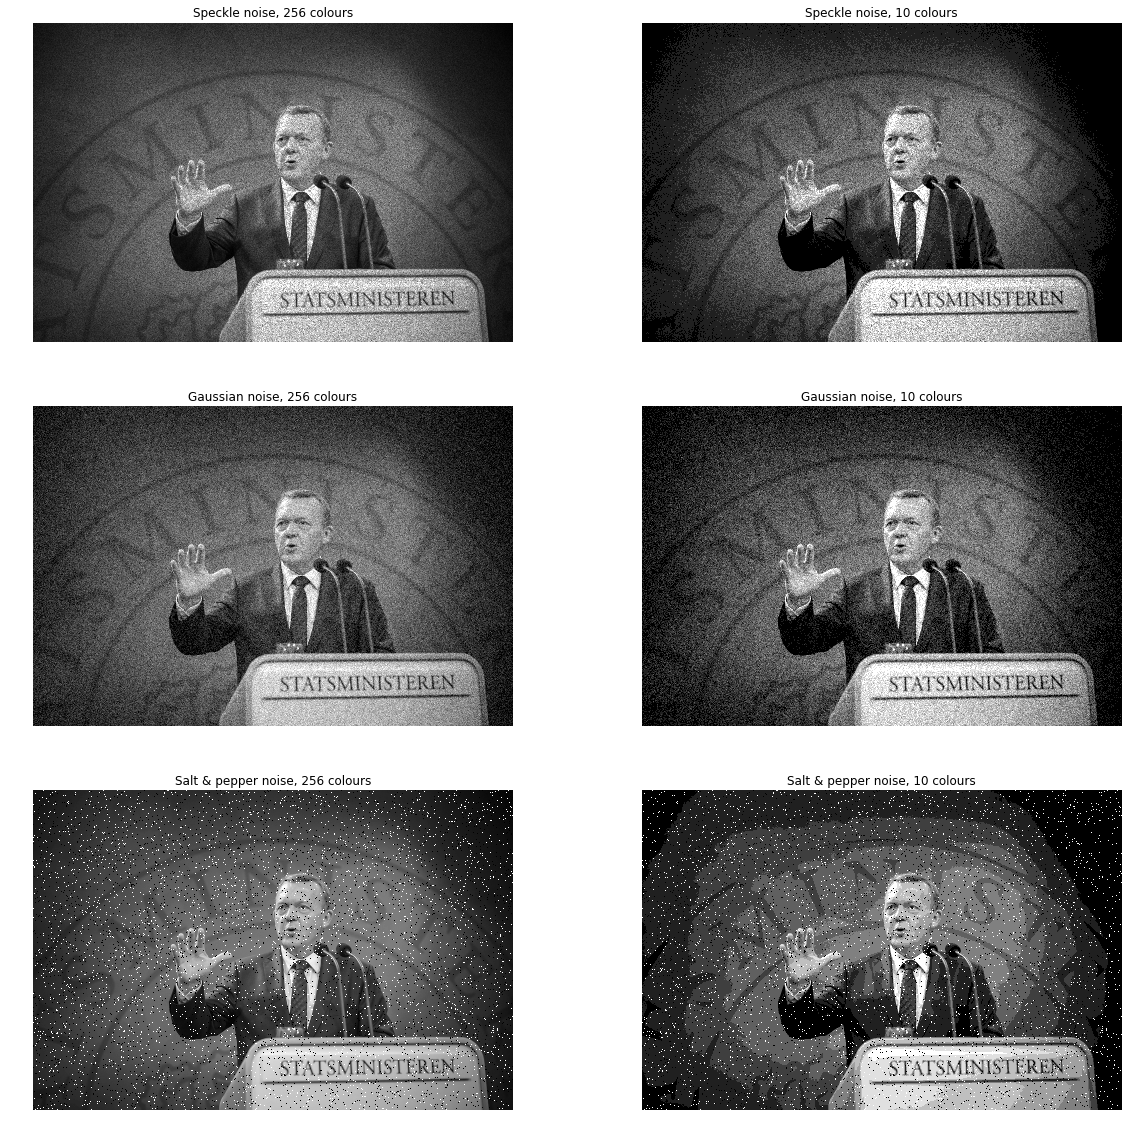

In [14]:
# Image pre-processing (degradation, etc.)
X = np.mean(img, 2)
X_disc = discretise(X, colours_bins)
Y_speckle = skimage.util.random_noise(X, 'speckle', mean=0, var=0.02)
Y_gauss   = skimage.util.random_noise(X, 'gaussian', mean=0, var=0.005)
Y_snp     = skimage.util.random_noise(X, 's&p')
Y_speckle_disc = discretise(Y_speckle, colours_bins)
Y_gauss_disc   = discretise(Y_gauss, colours_bins)
Y_snp_disc     = discretise(Y_snp, colours_bins)

fig, axarr = plt.subplots(3,2, figsize=(20,20))

axarr[0,0].imshow(Y_speckle, cmap='gray')
axarr[0,0].grid(False)
axarr[0,0].axis('off')
axarr[0,0].set_title("Speckle noise, 256 colours")

axarr[0,1].imshow(Y_speckle_disc, cmap='gray')
axarr[0,1].grid(False)
axarr[0,1].axis('off')
axarr[0,1].set_title("Speckle noise, " +str(colours_bins) + " colours")

axarr[1,0].imshow(Y_gauss, cmap='gray')
axarr[1,0].grid(False)
axarr[1,0].axis('off')
axarr[1,0].set_title("Gaussian noise, 256 colours")

axarr[1,1].imshow(Y_gauss_disc, cmap='gray')
axarr[1,1].grid(False)
axarr[1,1].axis('off')
axarr[1,1].set_title("Gaussian noise, " +str(colours_bins) + " colours")

axarr[2,0].imshow(Y_snp, cmap='gray')
axarr[2,0].grid(False)
axarr[2,0].axis('off')
axarr[2,0].set_title("Salt & pepper noise, 256 colours")

axarr[2,1].imshow(Y_snp_disc, cmap='gray')
axarr[2,1].grid(False)
axarr[2,1].axis('off')
axarr[2,1].set_title("Salt & pepper noise, " +str(colours_bins) + " colours")

#axarr[3,0].imshow(X, cmap='gray')
#axarr[3,0].grid(False)
#axarr[3,0].axis('off')
#axarr[3,0].set_title("No noise")

#axarr[3,1].imshow(X_disc, cmap='gray')
#axarr[3,1].grid(False)
#axarr[3,1].axis('off')
#axarr[3,1].set_title("No noise, " +str(colours_bins) + " colours")

plt.savefig("results/noise_preprocessing", bbox_inches='tight')
plt.show()


In [15]:
pottsobj = denoising.PottsMH(Y_speckle, beta=beta, sigma=Y_speckle.std(), bins = colours_bins)
pottsobj = denoising.PottsMH(Y_gauss, beta=beta, sigma=Y_gauss.std(), bins = colours_bins)
pottsobj = denoising.PottsMH(Y_snp, beta=beta, sigma=Y_snp.std(), bins = colours_bins)

In [16]:
%time X_speckle_samples = [pottsobj.metropolisHastings2(n_iter, Y_speckle_disc) for i in range(samples)]
%time X_gauss_samples   = [pottsobj.metropolisHastings2(n_iter, Y_gauss_disc) for i in range(samples)]
%time X_snp_samples     = [pottsobj.metropolisHastings2(n_iter, Y_snp_disc) for i in range(samples)]

CPU times: user 19min 23s, sys: 3.93 s, total: 19min 26s
Wall time: 19min 22s
CPU times: user 18min 57s, sys: 3.32 s, total: 19min
Wall time: 18min 56s
CPU times: user 18min 52s, sys: 3.4 s, total: 18min 56s
Wall time: 18min 53s


In [17]:
#%time X_speckle_samples = [pottsobj.metropolisHastings2(n_iter, Y_speckle_disc) for i in range(samples)]
#%time X_gauss_samples   = X_speckle_samples
#%time X_snp_samples     = X_speckle_samples

In [18]:
#X_speckle_map = pottsobj.MAP2(map_iter, Y_speckle_disc, tInit=t0, diffusion=diffusion)
#X_gauss_map   = pottsobj.MAP2(map_iter, Y_gauss_disc, tInit=t0, diffusion=diffusion)
#X_snp_map     = pottsobj.MAP2(map_iter, Y_snp_disc, tInit=t0, diffusion=diffusion)

In [19]:
%time X_speckle_mean = np.mean(X_speckle_samples, 0)
%time X_speckle_mode = mode(X_speckle_samples, 0)
%time X_gauss_mean   = np.mean(X_gauss_samples, 0)
%time X_gauss_mode   = mode(X_gauss_samples, 0)
%time X_snp_mean     = np.mean(X_snp_samples, 0)
%time X_snp_mode     = mode(X_snp_samples, 0)

CPU times: user 3.61 s, sys: 1.63 s, total: 5.24 s
Wall time: 25.6 s
CPU times: user 6.21 s, sys: 2.64 s, total: 8.85 s
Wall time: 40.6 s
CPU times: user 2.8 s, sys: 2.02 s, total: 4.82 s
Wall time: 10.2 s
CPU times: user 5.56 s, sys: 2.08 s, total: 7.64 s
Wall time: 21.2 s
CPU times: user 2.45 s, sys: 940 ms, total: 3.39 s
Wall time: 5.92 s
CPU times: user 5.56 s, sys: 1.05 s, total: 6.61 s
Wall time: 12.2 s


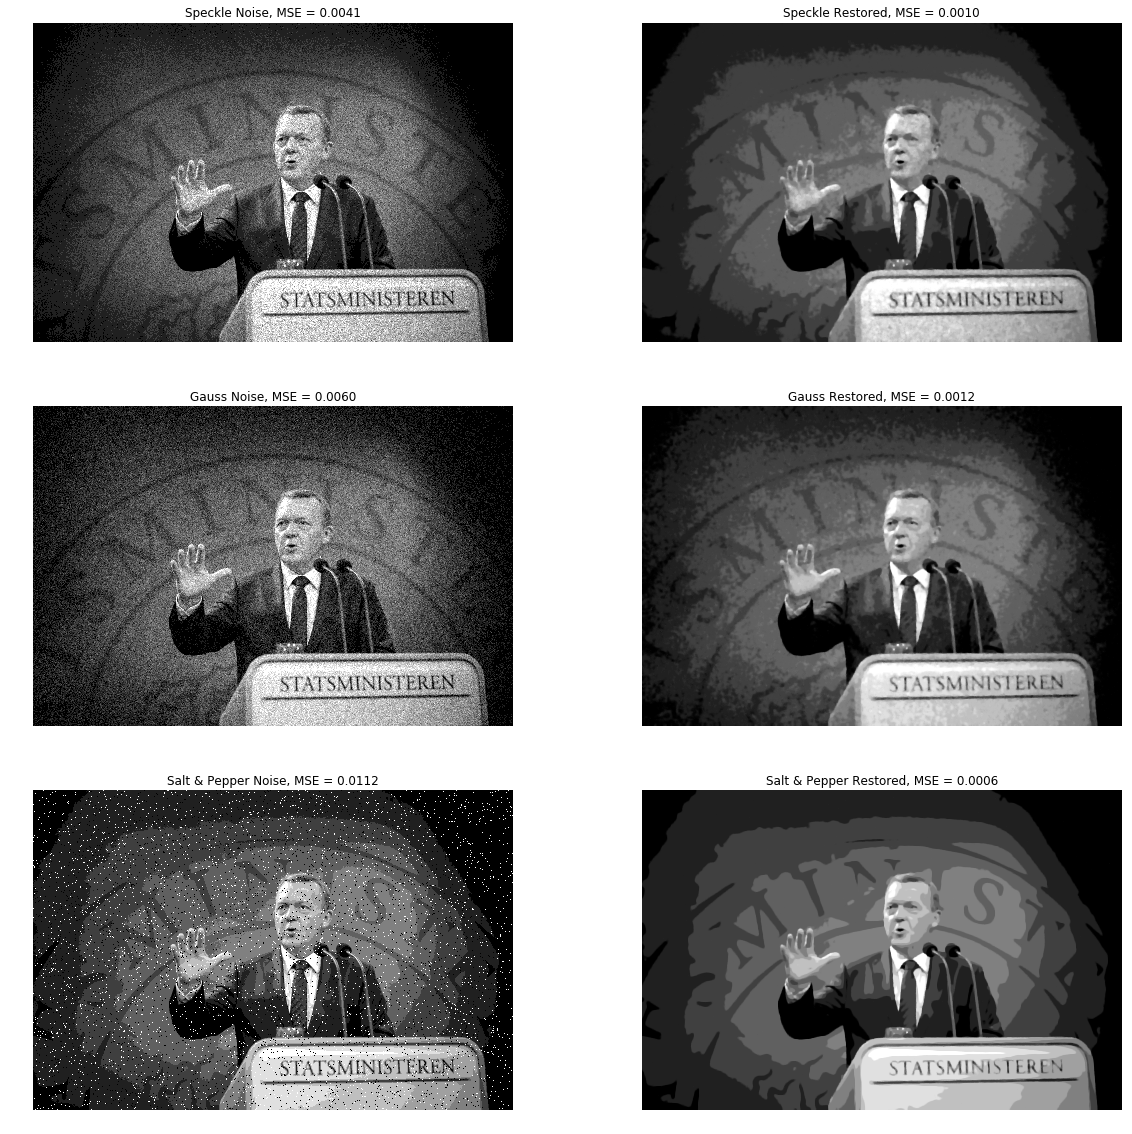

In [20]:
fig, axarr = plt.subplots(3,2, figsize=(20,20))

axarr[0,0].imshow(Y_speckle_disc, cmap='gray')
axarr[0,0].grid(False)
axarr[0,0].axis('off')
axarr[0,0].set_title("Speckle Noise, MSE = %.4f" % compare_mse(X_disc, Y_speckle_disc))

axarr[0,1].imshow(X_speckle_mean, cmap='gray')
axarr[0,1].grid(False)
axarr[0,1].axis('off')
axarr[0,1].set_title("Speckle Restored, MSE = %.4f" % compare_mse(X_disc, X_speckle_mean))

axarr[1,0].imshow(Y_gauss_disc, cmap='gray')
axarr[1,0].grid(False)
axarr[1,0].axis('off')
axarr[1,0].set_title("Gauss Noise, MSE = %.4f" % compare_mse(X_disc, Y_gauss_disc))

axarr[1,1].imshow(X_gauss_mean, cmap='gray')
axarr[1,1].grid(False)
axarr[1,1].axis('off')
axarr[1,1].set_title("Gauss Restored, MSE = %.4f" % compare_mse(X_disc, X_gauss_mean))

axarr[2,0].imshow(Y_snp_disc, cmap='gray')
axarr[2,0].grid(False)
axarr[2,0].axis('off')
axarr[2,0].set_title("Salt & Pepper Noise, MSE = %.4f" % compare_mse(X_disc, Y_snp_disc))

axarr[2,1].imshow(X_snp_mean, cmap='gray')
axarr[2,1].grid(False)
axarr[2,1].axis('off')
axarr[2,1].set_title("Salt & Pepper Restored, MSE = %.4f" % compare_mse(X_disc, X_snp_mean))

plt.savefig("results/noise_type_comparison", bbox_inches='tight')
plt.show()
